# Atividade 01

## Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

### 1. Importando bibliotecas

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
import calendar

### 2. Carregando o dataframe SINASC

In [2]:
# Lendo o arquivo CSV SINASC_RO_2019.csv e exibindo as primeiras linhas
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
# Exibindo as colunas do DataFrame sinasc_raw
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

### 1. Idade media das mães e dos pais por município (coluna munResNome)

In [4]:
# Calculando a idade média de mães e pais por município de residência e imprimindo o resultado
idade_media = sinasc_raw.groupby('munResNome').agg({'IDADEMAE': 'mean', 'IDADEPAI': 'mean'})
print(idade_media)

                            IDADEMAE   IDADEPAI
munResNome                                     
Alta Floresta D'Oeste      25.991826  29.548701
Alto Alegre dos Parecis    24.844156  29.179104
Alto Paraíso               24.960177  28.833333
Alvorada D'Oeste           25.770732  30.757282
Ariquemes                  25.607866  32.466667
Buritis                    25.559177  30.812500
Cabixi                     26.037500  34.333333
Cacaulândia                25.546667  36.333333
Cacoal                     26.890102  30.931854
Campo Novo de Rondônia     24.825301  30.500000
Candeias do Jamari         25.243323  29.894737
Castanheiras               27.281250  30.392857
Cerejeiras                 27.240506  31.652778
Chupinguaia                25.333333  29.629630
Colorado do Oeste          27.602804  34.354839
Corumbiara                 24.716535  32.470588
Costa Marques              24.412017  30.613636
Cujubim                    24.482927  31.400000
Espigão D'Oeste            26.093333  31

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [5]:
# Convertendo a coluna 'DTNASC' para o tipo de dado de data
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

# Filtrando os registros de aniversário (12 de julho)
aniversario = sinasc_raw[(sinasc_raw['DTNASC'].dt.day == 12) & (sinasc_raw['DTNASC'].dt.month == 7)]

# Calculando o peso médio por sexo e escolaridade da mãe
peso_medio_por_sexo_escolaridade = aniversario.groupby(['SEXO', 'ESCMAE'])['PESO'].mean()

# Imprimindo o resultado
print(peso_medio_por_sexo_escolaridade)

SEXO       ESCMAE         
Feminino   12 anos ou mais    3040.555556
           4 a 7 anos         2952.500000
           8 a 11 anos        3316.933333
Masculino  1 a 3 anos         3035.000000
           12 anos ou mais    3263.500000
           4 a 7 anos         3713.750000
           8 a 11 anos        3059.064516
Name: PESO, dtype: float64


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [6]:
# Filtrando dados excluindo 'Município ignorado - RO'
dados_menos_bebe = sinasc_raw[sinasc_raw['munResNome'] != 'Município ignorado - RO']

# Encontrando o município com menos nascimentos
menos_bebe = dados_menos_bebe['munResNome'].value_counts().idxmin()

# Calculando estatísticas de idade para mães e pais no município com menos nascimentos
idade_media_min_mae = dados_menos_bebe[dados_menos_bebe['munResNome'] == menos_bebe]['IDADEMAE'].mean()
idade_max_mae = dados_menos_bebe[dados_menos_bebe['munResNome'] == menos_bebe]['IDADEMAE'].max()
idade_min_mae = dados_menos_bebe[dados_menos_bebe['munResNome'] == menos_bebe]['IDADEMAE'].min()
idade_media_min_pai = dados_menos_bebe[dados_menos_bebe['munResNome'] == menos_bebe]['IDADEPAI'].mean()
idade_max_pai = dados_menos_bebe[dados_menos_bebe['munResNome'] == menos_bebe]['IDADEPAI'].max()
idade_min_pai = dados_menos_bebe[dados_menos_bebe['munResNome'] == menos_bebe]['IDADEPAI'].min()

# Imprimindo resultados
print(f"Menos bebês nasceram em {menos_bebe} em 2019.")
print(f"Idade média mães: {idade_media_min_mae}")
print(f"Idade máxima mães: {idade_max_mae}")
print(f"Idade mínima mães: {idade_min_mae}")
print(f"Idade média pais: {idade_media_min_pai}")
print(f"Idade máxima pais: {idade_max_pai}")
print(f"Idade mínima pais: {idade_min_pai}")

Menos bebês nasceram em Castanheiras em 2019.
Idade média mães: 27.28125
Idade máxima mães: 39
Idade mínima mães: 17
Idade média pais: 30.392857142857142
Idade máxima pais: 43.0
Idade mínima pais: 17.0


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [7]:
# Encontrando o município com mais nascimentos em março
mais_bebe_marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]['munResNome'].value_counts().idxmax()

# Filtrando dados para o município com mais nascimentos em março
dados_mais_bebe_marco = sinasc_raw[sinasc_raw['munResNome'] == mais_bebe_marco]

# Calculando estatísticas para a quantidade de filhos vivos e idade dos pais
estatisticas_filhos = dados_mais_bebe_marco['QTDFILVIVO'].describe()
estatisticas_idade_pais = dados_mais_bebe_marco['IDADEPAI'].describe()

# Imprimindo resultados
print(f"Mais bebês nasceram em {mais_bebe_marco} em março.")
print(f"Filhos vivos estatísticas:\n{estatisticas_filhos}")
print(f"Estatísticas Pais: {estatisticas_idade_pais}")

Mais bebês nasceram em Porto Velho em março.
Filhos vivos estatísticas:
count    7319.000000
mean        1.167236
std         1.222640
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: QTDFILVIVO, dtype: float64
Estatísticas Pais: count    672.000000
mean      32.352679
std        7.865620
min       16.000000
25%       27.000000
50%       32.000000
75%       37.000000
max       65.000000
Name: IDADEPAI, dtype: float64


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

- Em Castanheiras, onde nasceram menos bebês em 2019, a idade média das mães é de 27,28, com uma idade mínima de 17 e uma idade máxima de 39. 

- A idade média dos pais ali é de 28 e 30, variando de 17 a 43.

- O peso médio ao nascer de bebês nascidos em 12 de julho varia de acordo com o gênero e o nível de escolaridade da mãe.

- Para mulheres, o peso médio ao nascer é maior para mães com 8 a 11 anos de educação (3316,93g), enquanto para homens, é maior para mães com 4 a 7 anos de educação (3713,75g).

- O município com mais nascimentos em março é Porto Velho.

- As estatísticas para o número de filhos nascidos vivos em Porto Velho durante março mostram que a média é de aproximadamente 1,17 crianças, com um máximo de 12 e um mínimo de 0. 

- A idade média dos pais em Porto Velho é de cerca de 32,35, com uma idade mínima de 16 e uma idade máxima de 65.

# Atividade 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
# Definindo o limiar de latitude
latitude_threshold = -10.5

# Selecionando variáveis numéricas relevantes
numeric_variables = ['QTDFILMORT', 'QTDPARTNOR']

# Separando grupos com latitude acima e abaixo do limiar
above_threshold_group = sinasc_raw[sinasc_raw['munResLat'] >= latitude_threshold]
below_threshold_group = sinasc_raw[sinasc_raw['munResLat'] < latitude_threshold]

# Calculando estatísticas resumidas para cada grupo
above_summary_statistics = above_threshold_group[numeric_variables].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
below_summary_statistics = below_threshold_group[numeric_variables].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Imprimindo resultados
print("\nAcima -10.5:")
print(above_summary_statistics)
print("\nAbaixo -10.5:")
print(below_summary_statistics)


Acima -10.5:
         QTDFILMORT   QTDPARTNOR
sum     3538.000000  8771.000000
mean       0.291770     0.711759
min        0.000000     0.000000
max        9.000000    40.000000
median     0.000000     0.000000
std        0.627856     1.279042
var        0.394204     1.635949

Abaixo -10.5:
         QTDFILMORT   QTDPARTNOR
sum     3105.000000  5800.000000
mean       0.242521     0.452242
min        0.000000     0.000000
max       28.000000    41.000000
median     0.000000     0.000000
std        0.599430     1.123426
var        0.359317     1.262087


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
# Definindo o limiar de área
ar_threshold = 3000

# Selecionando variáveis numéricas relevantes
numeric_variables = ['QTDGESTANT', 'IDADEPAI']

# Separando grupos com área acima e abaixo do limiar
above_ar_group = sinasc_raw[sinasc_raw['munResArea'] >= ar_threshold]
below_ar_group = sinasc_raw[sinasc_raw['munResArea'] < ar_threshold]

# Calculando estatísticas resumidas para cada grupo
above_ar_summary = above_ar_group[numeric_variables].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
below_ar_summary = below_ar_group[numeric_variables].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Imprimindo resultados
print("\nAcima 3000:")
print(above_ar_summary)
print("\nAbaixo 3000:")
print(below_ar_summary)


Acima 3000:
          QTDGESTANT       IDADEPAI
sum     27046.000000  158424.000000
mean        1.310368      31.094014
min         0.000000      15.000000
max        52.000000      86.000000
median      1.000000      30.000000
std         1.447429       7.818364
var         2.095052      61.126809

Abaixo 3000:
         QTDGESTANT      IDADEPAI
sum     5870.000000  78074.000000
mean       1.134300     31.092792
min        0.000000     16.000000
max        9.000000     69.000000
median     1.000000     30.000000
std        1.208914      7.675474
var        1.461473     58.912900


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
# Definindo o número de bins
num_bins = 5

# Selecionando variáveis numéricas relevantes
numeric_variables = ['QTDPARTCES', 'PESO']

# Calculando estatísticas resumidas com base no agrupamento da altura do município
alt_summary_statistics = (
    sinasc_raw.assign(alt_bins=pd.cut(sinasc_raw['munResAlt'], bins=num_bins, precision=0))
    .groupby('alt_bins', observed=False)[numeric_variables]
    .agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var']))

# Imprimindo resultados
print("\nAgrupamento munResAlt:")
print(alt_summary_statistics)


Agrupamento munResAlt:
               QTDPARTCES                                                  \
                      sum      mean  min   max median       std       var   
alt_bins                                                                    
(84.0, 187.0]      9007.0  0.488078  0.0  12.0    0.0  0.741756  0.550202   
(187.0, 289.0]     2682.0  0.628103  0.0   5.0    0.0  0.749706  0.562058   
(289.0, 391.0]      307.0  0.546263  0.0   4.0    0.0  0.763818  0.583417   
(391.0, 493.0]      202.0  0.553425  0.0   3.0    0.0  0.737921  0.544528   
(493.0, 595.0]      938.0  0.591798  0.0   4.0    0.0  0.754152  0.568746   

                    PESO                                              \
                     sum         mean  min   max  median         std   
alt_bins                                                               
(84.0, 187.0]   65481244  3250.818845  292  5480  3280.0  546.449052   
(187.0, 289.0]  13979470  3211.456467  285  5985  3245.0  532.614364   

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

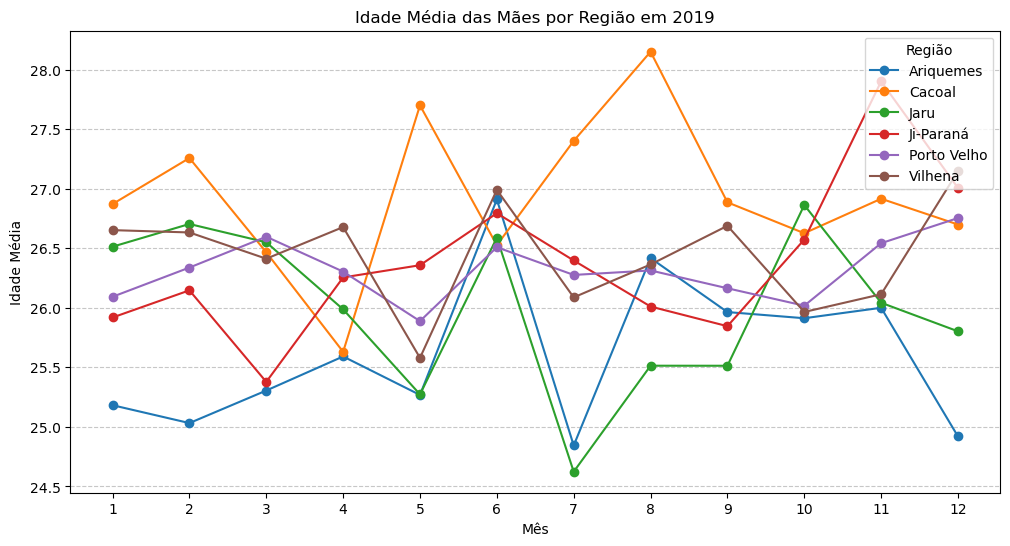

In [11]:
# Lendo o arquivo CSV e convertendo a coluna de data para o tipo de dado de data
sinasc = pd.read_csv('SINASC_RO_2019.csv', parse_dates=['DTNASC'])

# Municípios de interesse
municipios_interesse = ['Porto Velho', 'Ariquemes', 'Jaru', 'Ji-Paraná', 'Cacoal', 'Vilhena']

# Filtrando dados para os municípios de interesse
filtered_data = sinasc[sinasc['munResNome'].isin(municipios_interesse)]

# Calculando a idade média por mês
average_age_per_month_region = filtered_data.groupby([filtered_data['DTNASC'].dt.month, 'munResNome'])['IDADEMAE'].mean().unstack()

# Criando o gráfico
average_age_per_month_region.plot(figsize=(12, 6), marker='o')
plt.title('Idade Média das Mães por Região em 2019')
plt.xlabel('Mês')
plt.ylabel('Idade Média')
plt.xticks(list(range(1, 13)), rotation=0)
plt.legend(title='Região', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave

In [12]:
# Lendo o arquivo CSV com dados de regiões e municípios
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')

# Criando um dicionário de municípios para regiões
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

# Exibindo as primeiras linhas do DataFrame
dados_ro.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [13]:
# Exibindo os nomes das colunas do DataFrame
dados_ro.columns

Index(['municipio', 'regiao', 'idh', 'ifdm', 'pib'], dtype='object')

In [14]:
# Exibindo os tipos de dados das colunas do DataFrame
dados_ro.dtypes

municipio     object
regiao        object
idh          float64
ifdm         float64
pib            int64
dtype: object

### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M

In [15]:
# Criando uma nova coluna 'faixa_idh' com base nos intervalos especificados
dados_ro['faixa_idh'] = pd.cut(dados_ro['idh'], bins=[0, 0.6, 0.7, 0.8], labels=['Baixo', 'Médio', 'Alto'])

# Agrupando por faixa_idh e calculando a média do IDH e a contagem de municípios
grouped_idh = dados_ro.groupby('faixa_idh', observed=False).agg({'idh': 'mean', 'municipio': 'count'})

# Imprimindo os resultados
print("IDH")
print(grouped_idh)

IDH
                idh  municipio
faixa_idh                     
Baixo      0.591333          9
Médio      0.644784         37
Alto       0.718500          6


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM

In [16]:
# Criando uma nova coluna 'faixa_ifdm' com base nos intervalos especificados
dados_ro['faixa_ifdm'] = pd.cut(dados_ro['ifdm'], bins=[0, 0.5, 0.7, 1.0], labels=['Baixo', 'Médio', 'Alto'])

# Agrupando por faixa_ifdm e calculando a média do IFDM e a contagem de municípios
grouped_ifdm = dados_ro.groupby('faixa_ifdm', observed=False).agg({'ifdm': 'mean', 'municipio': 'count'})

# Imprimindo os resultados
print("\nIFDM")
print(grouped_ifdm)


IFDM
                ifdm  municipio
faixa_ifdm                     
Baixo       0.456200          1
Médio       0.594649         45
Alto        0.734650          6


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB

In [17]:
# Criando uma nova coluna 'faixa_pib' com base nos intervalos especificados
dados_ro['faixa_pib'] = pd.cut(dados_ro['pib'], bins=[0, 1000000, 10000000, 100000000], labels=['Baixo', 'Médio', 'Alto'])

# Agrupando por faixa_pib e calculando a média do PIB e a contagem de municípios
grouped_pib = dados_ro.groupby('faixa_pib', observed=False).agg({'pib': 'mean', 'municipio': 'count'})

# Imprimindo os resultados
print("\nPIB")
print(grouped_pib)


PIB
                    pib  municipio
faixa_pib                         
Baixo      2.822857e+05         44
Médio      2.200832e+06          7
Alto       1.791207e+07          1


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- Municípios acima de -10.5 de latitude têm uma média ligeiramente maior de filhos mortos e partos normais e o oposto também é verdade.

- Municípios com área acima de 3000 têm significantemente mais entradas de gestantes.

- Nota-se que a maioria dos municípios está na faixa média para IDH e IFDM, enquanto o PIB não acompanha a tendencia.